In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

scale_factor = 1000
train_df["median_house_value"] /= scale_factor
test_df["median_house_value"] /= scale_factor



def build_model(my_learning_rate):
    
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Dense(units = 1, input_shape=(1,)))
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate),
                 loss = "mean_squared_error", metrics = [tf.keras.metrics.RootMeanSquaredError()])
    
    return model

def train_model(model, df, feature, label, my_epochs, my_batch_size = None, my_validation_split = 0.1):
    
    history = model.fit(x = df[feature],
                        y = df[label],
                        batch_size = my_batch_size,
                        epochs = my_epochs,
                        validation_split = my_validation_split)
    
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history) #Contains the values of lossses and metrics during training
    rmse = hist["root_mean_squared_error"]
    
    return epochs, rmse, history.history

def plt_the_loss_curve(epochs, mae_training, mae_validation):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs[1:], mae_training[1:], label= "Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label= "Validation Loss")
    plt.legend()
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()

Train on 15300 samples, validate on 1700 samples
Epoch 1/30
15300/15300 [==============================] - 1s 35us/sample - loss: 41532.5380 - root_mean_squared_error: 203.7953 - val_loss: 30288.1486 - val_root_mean_squared_error: 174.0349
Epoch 2/30
15300/15300 [==============================] - 0s 14us/sample - loss: 22320.3999 - root_mean_squared_error: 149.4001 - val_loss: 15348.6642 - val_root_mean_squared_error: 123.8897
Epoch 3/30
15300/15300 [==============================] - 0s 12us/sample - loss: 11064.7949 - root_mean_squared_error: 105.1893 - val_loss: 8113.7386 - val_root_mean_squared_error: 90.0763
Epoch 4/30
15300/15300 [==============================] - 0s 13us/sample - loss: 7228.4122 - root_mean_squared_error: 85.0201 - val_loss: 7175.1436 - val_root_mean_squared_error: 84.7062
Epoch 5/30
15300/15300 [==============================] - 0s 13us/sample - loss: 6998.4852 - root_mean_squared_error: 83.6569 - val_loss: 7174.3496 - val_root_mean_squared_error: 84.7015
Epoch 

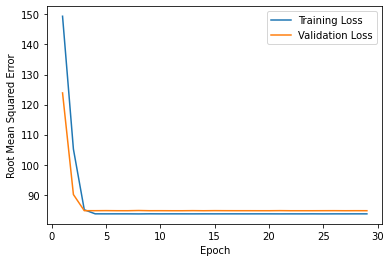

In [35]:
learning_rate = 0.08
epochs = 30
batch_size = 100

validation_split = 0.1

my_feature = "median_income"
my_label = "median_house_value"

my_model = None

my_model = build_model(learning_rate)

shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, my_label, epochs, batch_size, validation_split)

plt_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])